In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
t_hlrc_path = "output/t_hlrc.txt"
t_hfrc_path = "output/t_hfrc.txt"
t_horc_path = "output/t_horc.txt"

t_hlrc = pd.read_csv(t_hlrc_path, sep="\t")  # Read tab-separated values into DataFrame
t_hfrc = pd.read_csv(t_hfrc_path, sep="\t")
t_horc = pd.read_csv(t_horc_path, sep="\t")

# Display the first few rows of each DataFrame
print(t_hlrc.head())
print(t_hfrc.head())
print(t_horc.head())

      n     m   k  t_hlrc
0   100  1000   4    0.01
1  1000  1000   4    0.01
2   200  1000   4    0.01
3    50  1000   4    0.01
4   500  1000  10    0.03
      n     m   k  t_hfrc
0   100  1000   4     0.0
1  1000  1000   4     0.0
2   200  1000   4     0.0
3    50  1000   4     0.0
4   500  1000  10     0.0
      n     m   k  t_horc
0   100  1000   4    0.68
1  1000  1000   4    9.48
2   200  1000   4    2.33
3    50  1000   4    0.06
4   500  1000  10   96.59


In [4]:
t_df = pd.merge(t_hlrc[['n', 'm', 'k', 't_hlrc']], 
                t_hfrc[['n', 'm', 'k', 't_hfrc']], 
                on=['n', 'm', 'k'])

t_df = pd.merge(t_df, 
                t_horc[['n', 'm', 'k', 't_horc']], 
                on=['n', 'm', 'k'])

# Display the merged DataFrame
print(t_df.head())

      n     m   k  t_hlrc  t_hfrc  t_horc
0   100  1000   4    0.01     0.0    0.68
1  1000  1000   4    0.01     0.0    9.48
2   200  1000   4    0.01     0.0    2.33
3    50  1000   4    0.01     0.0    0.06
4   500  1000  10    0.03     0.0   96.59


/tmp/ipykernel_2729033/1407418928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_edge.sort_values("m",inplace=True)


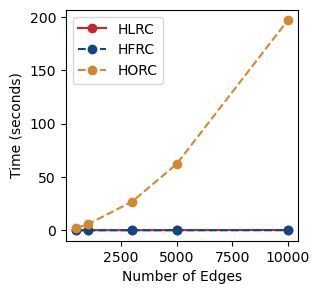

In [15]:
# X-axis: number of edge
t_edge = t_df[(t_df.n == 500)& (t_df.k==4)]
t_edge.sort_values("m",inplace=True)
plt.figure(figsize=(3, 3))

plt.plot(t_edge['m'], t_edge['t_hlrc'], marker='o', label='HLRC',color='#c1272d')
plt.plot(t_edge['m'], t_edge['t_hfrc'], marker='o', label='HFRC', linestyle='--', color='#114684')
plt.plot(t_edge['m'], t_edge['t_horc'], marker='o', label='HORC',linestyle='--',color='#d4872f')

plt.xlabel('Number of Edges')
plt.ylabel('Time (seconds)')

plt.legend()
plt.savefig("figures/edges_(n,k=500,4).pdf",bbox_inches='tight');
plt.show()

/tmp/ipykernel_2729033/798598418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.sort_values("n",inplace=True)


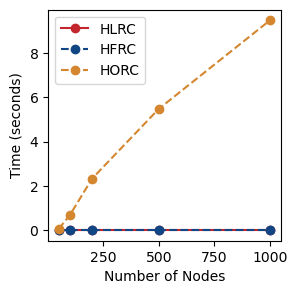

In [19]:
# X-axis: number of nodes
t = t_df[(t_df.m == 1000)& (t_df.k==4)]
t.sort_values("n",inplace=True)
plt.figure(figsize=(3, 3))

plt.plot(t['n'], t['t_hlrc'], marker='o', label='HLRC',color='#c1272d')
plt.plot(t['n'], t['t_hfrc'], marker='o', label='HFRC', linestyle='--', color='#114684')
plt.plot(t['n'], t['t_horc'], marker='o', label='HORC',linestyle='--',color='#d4872f')

plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')

plt.legend()
plt.savefig("figures/nodes_(m,k=1000,4).pdf",bbox_inches='tight');
plt.show()

/tmp/ipykernel_2729033/1112419197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.sort_values("k",inplace=True)


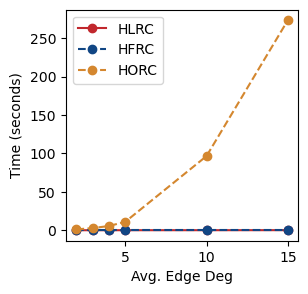

In [21]:
# X-axis: edge degree k
t = t_df[(t_df.n == 500)& (t_df.m==1000)]
t.sort_values("k",inplace=True)
plt.figure(figsize=(3, 3))

plt.plot(t['k'], t['t_hlrc'], marker='o', label='HLRC',color='#c1272d')
plt.plot(t['k'], t['t_hfrc'], marker='o', label='HFRC', linestyle='--', color='#114684')
plt.plot(t['k'], t['t_horc'], marker='o', label='HORC',linestyle='--',color='#d4872f')

plt.xlabel('Avg. Edge Deg')
plt.ylabel('Time (seconds)')

plt.legend()
plt.savefig("figures/edge_deg_(m,n=1000,500).pdf",bbox_inches='tight');
plt.show()